# **Рубежный контроль №1**
**Студент:** Никольский Даниил Романович  

**Группа:** ИУ5-22М   

**Вариант:** 8  

**Задачи:** 8, 28

**Доп. требование:** Гистограмма

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Загрузка и просмотр датасета

Датасет содержит данные о географии ковида. Для анализа географии используются 6 числовых показателей: общий процент риска, высокий риск на койку отделения интенсивной терапии, высокий риск для больницы, койки отделения интенсивной терапии, больницы, общий риск.

In [2]:
df = pd.read_csv('./mmsa-icu-beds2.csv')

In [3]:
df.shape

(136, 7)

In [4]:
df

,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
0,"San Juan-Carolina-Caguas, PR",52.88%,NaN,NaN,NaN,NaN,923725.203
1,"Manhattan, KS",47.29%,4489.848750,8979.69750,8.0,4.0,35918.790
2,"Hilton Head Island-Bluffton-Beaufort, SC",62.72%,3904.163571,36438.86000,28.0,3.0,109316.580
3,"Kahului-Wailuku-Lahaina, HI",59.13%,3860.557000,19302.78500,20.0,4.0,77211.140
4,"Spartanburg, SC",66.12%,3786.115556,85187.60000,45.0,2.0,170375.200
...,...,...,...,...,...,...,...
131,"Charleston, WV",75.97%,831.689744,25948.72000,156.0,5.0,129743.600
132,"Duluth, MN-WI",60.34%,730.523135,12286.07091,185.0,11.0,135146.780
133,"Reno, NV",57.86%,638.824743,42290.19800,331.0,5.0,211450.990
134,"Gainesville, FL",56.38%,621.449952,65252.24500,210.0,2.0,130504.490


In [5]:
df.head()

,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
0,"San Juan-Carolina-Caguas, PR",52.88%,NaN,NaN,NaN,NaN,923725.203
1,"Manhattan, KS",47.29%,4489.848750,8979.6975,8.0,4.0,35918.790
2,"Hilton Head Island-Bluffton-Beaufort, SC",62.72%,3904.163571,36438.8600,28.0,3.0,109316.580
3,"Kahului-Wailuku-Lahaina, HI",59.13%,3860.557000,19302.7850,20.0,4.0,77211.140
4,"Spartanburg, SC",66.12%,3786.115556,85187.6000,45.0,2.0,170375.200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSA                    136 non-null    object 
 1   total_percent_at_risk   135 non-null    object 
 2   high_risk_per_ICU_bed   130 non-null    float64
 3   high_risk_per_hospital  133 non-null    float64
 4   icu_beds                133 non-null    float64
 5   hospitals               134 non-null    float64
 6   total_at_risk           133 non-null    float64
dtypes: float64(5), object(2)
memory usage: 7.6+ KB


## 1. Задача 8
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения модой.

In [7]:
# Количество пропусков
[(i, df[i].isnull().sum()) for i in df.columns]

[('MMSA', 0),
 ('total_percent_at_risk', 1),
 ('high_risk_per_ICU_bed', 6),
 ('high_risk_per_hospital', 3),
 ('icu_beds', 3),
 ('hospitals', 2),
 ('total_at_risk', 3)]

In [8]:
# Похоже на нормальное
# total_at_risk_ev = df['total_at_risk'].mean() + 3*df['total_at_risk'].std()
# total_at_risk_ev
mode_high_risk_per_ICU_bed = df['high_risk_per_ICU_bed'].mean()
mode_high_risk_per_ICU_bed # Самое популярное значение

1928.9759412084618

In [9]:
df['high_risk_per_ICU_bed'].fillna(mode_high_risk_per_ICU_bed, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSA                    136 non-null    object 
 1   total_percent_at_risk   135 non-null    object 
 2   high_risk_per_ICU_bed   136 non-null    float64
 3   high_risk_per_hospital  133 non-null    float64
 4   icu_beds                133 non-null    float64
 5   hospitals               134 non-null    float64
 6   total_at_risk           133 non-null    float64
dtypes: float64(5), object(2)
memory usage: 7.6+ KB


In [11]:
[(i, df[i].isnull().sum()) for i in df.columns]

[('MMSA', 0),
 ('total_percent_at_risk', 1),
 ('high_risk_per_ICU_bed', 0),
 ('high_risk_per_hospital', 3),
 ('icu_beds', 3),
 ('hospitals', 2),
 ('total_at_risk', 3)]

Из результатов видно, что пропуски в колонке high_risk_per_ICU_bed были устранены.

## 2. Задача 28

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе межквартильного размаха.

In [12]:
df2 = pd.read_csv('./mmsa-icu-beds2.csv')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSA                    136 non-null    object 
 1   total_percent_at_risk   135 non-null    object 
 2   high_risk_per_ICU_bed   130 non-null    float64
 3   high_risk_per_hospital  133 non-null    float64
 4   icu_beds                133 non-null    float64
 5   hospitals               134 non-null    float64
 6   total_at_risk           133 non-null    float64
dtypes: float64(5), object(2)
memory usage: 7.6+ KB


In [14]:
# Функция вычисления верхней и нижней границы выбросов, которая показана в лекции
def get_outlier_boundaries(df, col,k):
    q1= 0.25
    q2= 0.75
    IQR = df[col].quantile(q2) - df[col].quantile(q1)
    print(IQR,(k * IQR))
    print(df[col].quantile(q1))
    print(df[col].quantile(q2))
    lower_boundary = df[col].quantile(q1) - (k * IQR)
    upper_boundary = df[col].quantile(q2) + (k * IQR)
    return lower_boundary, upper_boundary 

In [15]:
lower_boundary, upper_boundary = get_outlier_boundaries(df2, "high_risk_per_hospital", 1)
lower_boundary,upper_boundary

26456.65338 26456.65338
30190.0025
56646.65588


(3733.349119999999, 83103.30926)

<AxesSubplot:>

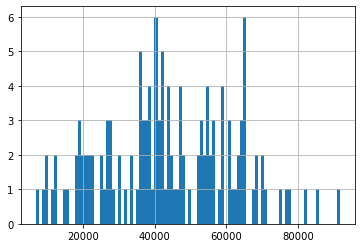

In [16]:
df2['high_risk_per_hospital'].hist(bins=100)

In [17]:
# Флаги для удаления выбросов
outliers_temp = np.where(df2['high_risk_per_hospital'] > upper_boundary, True, np.where(df2['high_risk_per_hospital'] < lower_boundary, True, False))
# Удаление данных на основе флага
outliers_temp
data_trimmed = df2.loc[~(outliers_temp), ] 

In [18]:
data_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 135
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MMSA                    134 non-null    object 
 1   total_percent_at_risk   133 non-null    object 
 2   high_risk_per_ICU_bed   128 non-null    float64
 3   high_risk_per_hospital  131 non-null    float64
 4   icu_beds                131 non-null    float64
 5   hospitals               132 non-null    float64
 6   total_at_risk           131 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.4+ KB


<AxesSubplot:>

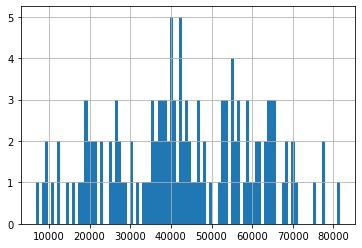

In [19]:
data_trimmed['high_risk_per_hospital'].hist(bins=100)

На новом графике можем наблюдать, что выбросы вне квантиля были успешно устранены и данные стали более чистыми

## Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

In [21]:
df_dop = pd.read_csv('./mmsa-icu-beds2.csv')

<AxesSubplot:xlabel='icu_beds', ylabel='total_at_risk'>

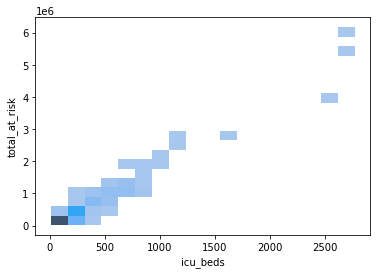

In [25]:
sns.histplot(x=df_dop['icu_beds'], y=df_dop['total_at_risk'])

Построили график рассеяния, показывающий зависимость между двумя признаками: icu beds (кровати отделения интенсивной терапии) и total_at_risk (риск для больницы).